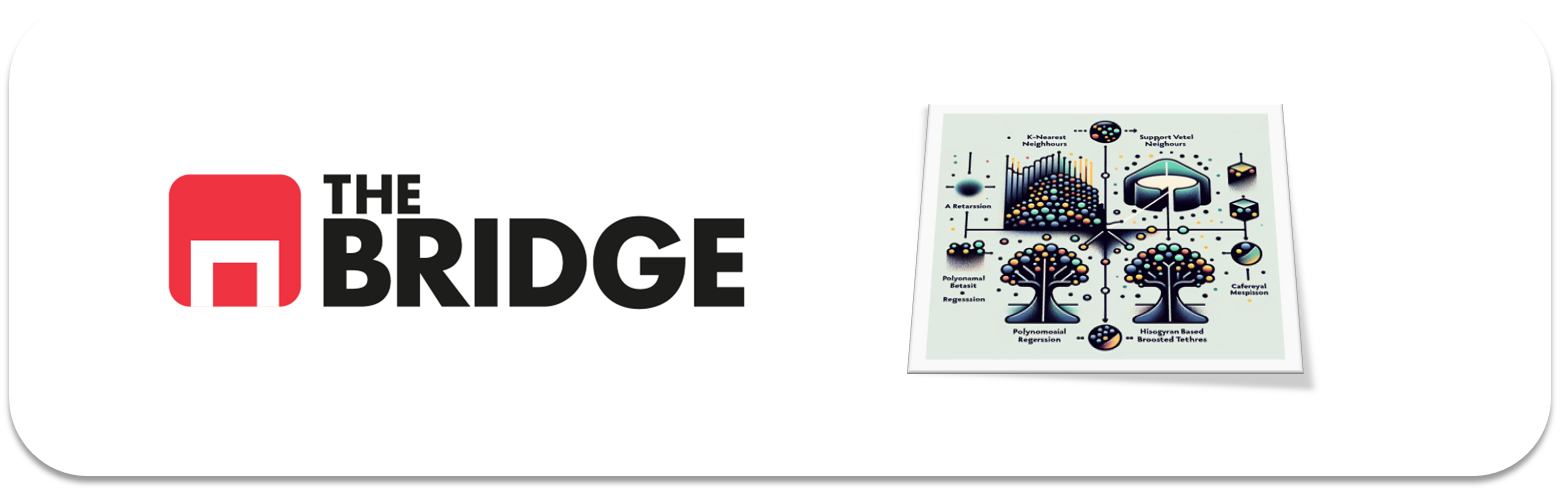

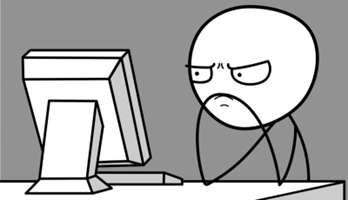

Para hacer un **repaso a los problemas de clasificacion con ML**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCIóN: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos básicos en la creación de un modelo de ML para resolver un problema de predicción a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificación a través de los siguientes pasos:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluación contra test.  
11. Análisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.  

### El problema

La unidad oncológica del hospital de Madison, Wisconsin, está trabajando en un tratamiento muy prometedor sobre el cáncer de mama. Desgraciadamente es un tratamiento con efectos secundarios y todavía excesivamente caro, pero cuya efectividad es extraordinaria si se aplica en las primeras etpas o incluso antes de haberlo desarrollado. 

En este sentido, la univeridad quiere disponer de un modelo que le permita detectar potenciales pacientes pero con un alto nivel de acierto en detectar quien puede tener cáncer para no aplicar el tratamiento a personas que no fueran a desarrollarlo y por tanto no sólo perder dinero, sino también, y más importante causar problemas a esas personas. 

Nos piden trabajar sobre datos que ya tienen, y que pueden obtener facilmente de cualquier futuro aspirante a las pruebas y ensayos con el tratamiento, de pacientes que desarrollaron y no el cáncer. Sobre ese dataset quieren que les proporcionemos el mejor modelo de predicción de quién desarrollará o no el cáncer y que cumpla con las expectativas del párrafo anterior.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Evitar los warning
import warnings
warnings.filterwarnings("ignore")

# Mejora características de impresión
from pprint import pprint

# Tratamiento de variables categóricas
from sklearn.preprocessing import OrdinalEncoder
pd.get_dummies # para one-hot encoding

# Tratamiento variables numéricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Separación df
from sklearn.model_selection import train_test_split

# Evaluación regresión lineal
from sklearn import linear_model, metrics, model_selection
from sklearn.model_selection import cross_val_score

# Regularización
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Evaluación regresión logística
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error



# Entrenamiento modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

# Hacer 'x' subconjuntos de 'y' elementos
from sklearn.model_selection import StratifiedShuffleSplit

# Acumular los resultados de la evaluación 'accuracy' en una lista
from sklearn.metrics import accuracy_score
# Representar el árbol de forma visual
from sklearn.tree import plot_tree

# Optimización hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Ensamblados
from sklearn.ensemble import RandomForestClassifier # Clasificación
from sklearn.ensemble import RandomForestRegressor # Regresión
from sklearn.ensemble import AdaBoostClassifier # Clasificación
from sklearn.ensemble import AdaBoostRegressor # Regresión
from sklearn.ensemble import GradientBoostingRegressor # Regresión
from sklearn.ensemble import GradientBoostingClassifier # Clasificación
from xgboost import XGBRFRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostClassifier

# Otros modelos supervisados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC # "support vector classifier"
from sklearn.svm import SVR # "support vector regressor"

# Para diferentes gráficos
from sklearn.pipeline import make_pipeline 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# Obtener todas las métrica que acepta "scoring"
from sklearn.metrics import get_scorer_names # y se pone get_scorer_names()


# Equilibrado de clases
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos
from sklearn.utils import resample

from toolbox_ML import *
from EDA_function_tools import *

### Ejercicio 1: Entendiendo el problema de "Negocio"

En función de la descripción del problema de "negocio" y sin mirar todavía los datos, ¿qué tipo de problema de clasificación vamos a resolver? ¿Qué métricas creess más conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre sí?

Si no quieren equivocarse sería un problema de 'precision' dado que quieren estar muy seguros de que quien participa en el programa realmente vaya a desarrollar la enfermedad.  
Hay que minimizar los falsos positivos.

### Ejercicio 2: Obtención y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripción general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignalé el nombre de la columna correspondiente.

In [2]:
df = pd.read_csv("./data/wisconsin_cancer.csv",sep="|")
df.head(8)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   
6         M        18.25         19.98          119.60     1040.0   
7         M        13.71         20.83           90.20      577.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   

   symmetry_mean  ...  compactness_se  concavity_se  concave points_se  \
0         0.2419  ...         0.04904       0.05373            0.01587   
1         0.1812  ...         0.01308       0.01860            0.01340   
2         0.2069  ...         0.04006       0.03832            0.02058   
3         0.2597  ...         0.07458       0.05661            0.01867   
4         0.1809  ...         0.02461       0.05688            0.01885   
5         0.2087  ...         0.03345       0.03672            0.01137   
6         0.1794  ...         0.01382       0.02254            0.01039   
7         0.2196  ...         0.03029       0.02488            0.01448   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   
5      0.02165              0.005082         15.47          23.75   
6      0.01369              0.002179         22.88          27.66   
7      0.01486              0.005412         17.06          28.14   

   perimeter_worst  area_worst  smoothness_worst  
0           184.60      2019.0            0.1622  
1           158.80      1956.0            0.1238  
2           152.50      1709.0            0.1444  
3            98.87       567.7            0.2098  
4           152.20      1575.0            0.1374  
5           103.40       741.6            0.1791  
6           153.20      1606.0            0.1442  
7           110.60       897.0            0.1654  

[8 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

| Variable                | Traducción                      |
|-------------------------|---------------------------------|
| diagnosis               | diagnóstico                     |
| radius_mean             | radio_promedio                  |
| texture_mean            | textura_promedio                |
| perimeter_mean          | perímetro_promedio              |
| area_mean               | área_promedio                   |
| smoothness_mean         | suavidad_promedio               |
| compactness_mean        | compacidad_promedio             |
| concavity_mean          | concavidad_promedio             |
| concave points_mean     | puntos_cóncavos_promedio        |
| symmetry_mean           | simetría_promedio               |
| fractal_dimension_mean  | dimensión_fractal_promedio      |
| radius_se               | radio_error_estándar            |
| texture_se              | textura_error_estándar          |
| perimeter_se            | perímetro_error_estándar        |
| area_se                 | área_error_estándar             |
| smoothness_se           | suavidad_error_estándar         |
| compactness_se          | compacidad_error_estándar       |
| concavity_se            | concavidad_error_estándar       |
| concave points_se       | puntos_cóncavos_error_estándar  |
| symmetry_se             | simetría_error_estándar         |
| fractal_dimension_se    | dimensión_fractal_error_estándar|
| radius_worst            | radio_peor                      |
| texture_worst           | textura_peor                    |
| perimeter_worst         | perímetro_peor                  |
| area_worst              | área_peor                       |
| smoothness_worst        | suavidad_peor                   |


Parece que la variable target es `diagnosis`

In [4]:
df.diagnosis.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<Axes: >

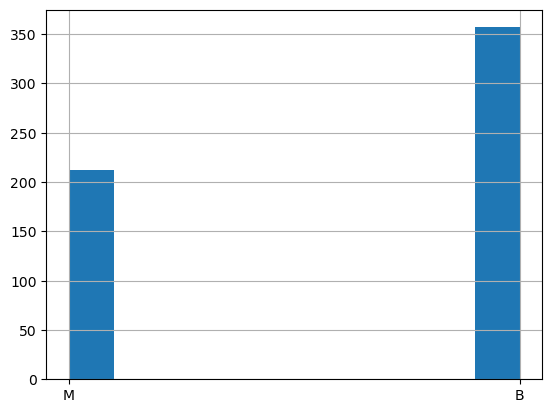

In [5]:
df.diagnosis.hist()

In [6]:
df['diagnosis_bin'] = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)

In [7]:
df.diagnosis_bin.value_counts(normalize=True)

diagnosis_bin
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [8]:
target = df.diagnosis_bin

In [9]:
df.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave points_se         0
symmetry_se               0
fractal_dimension_se      0
radius_worst              0
texture_worst             0
perimeter_worst           0
area_worst                0
smoothness_worst          0
diagnosis_bin             0
dtype: int64

In [10]:
df.duplicated().sum()

0

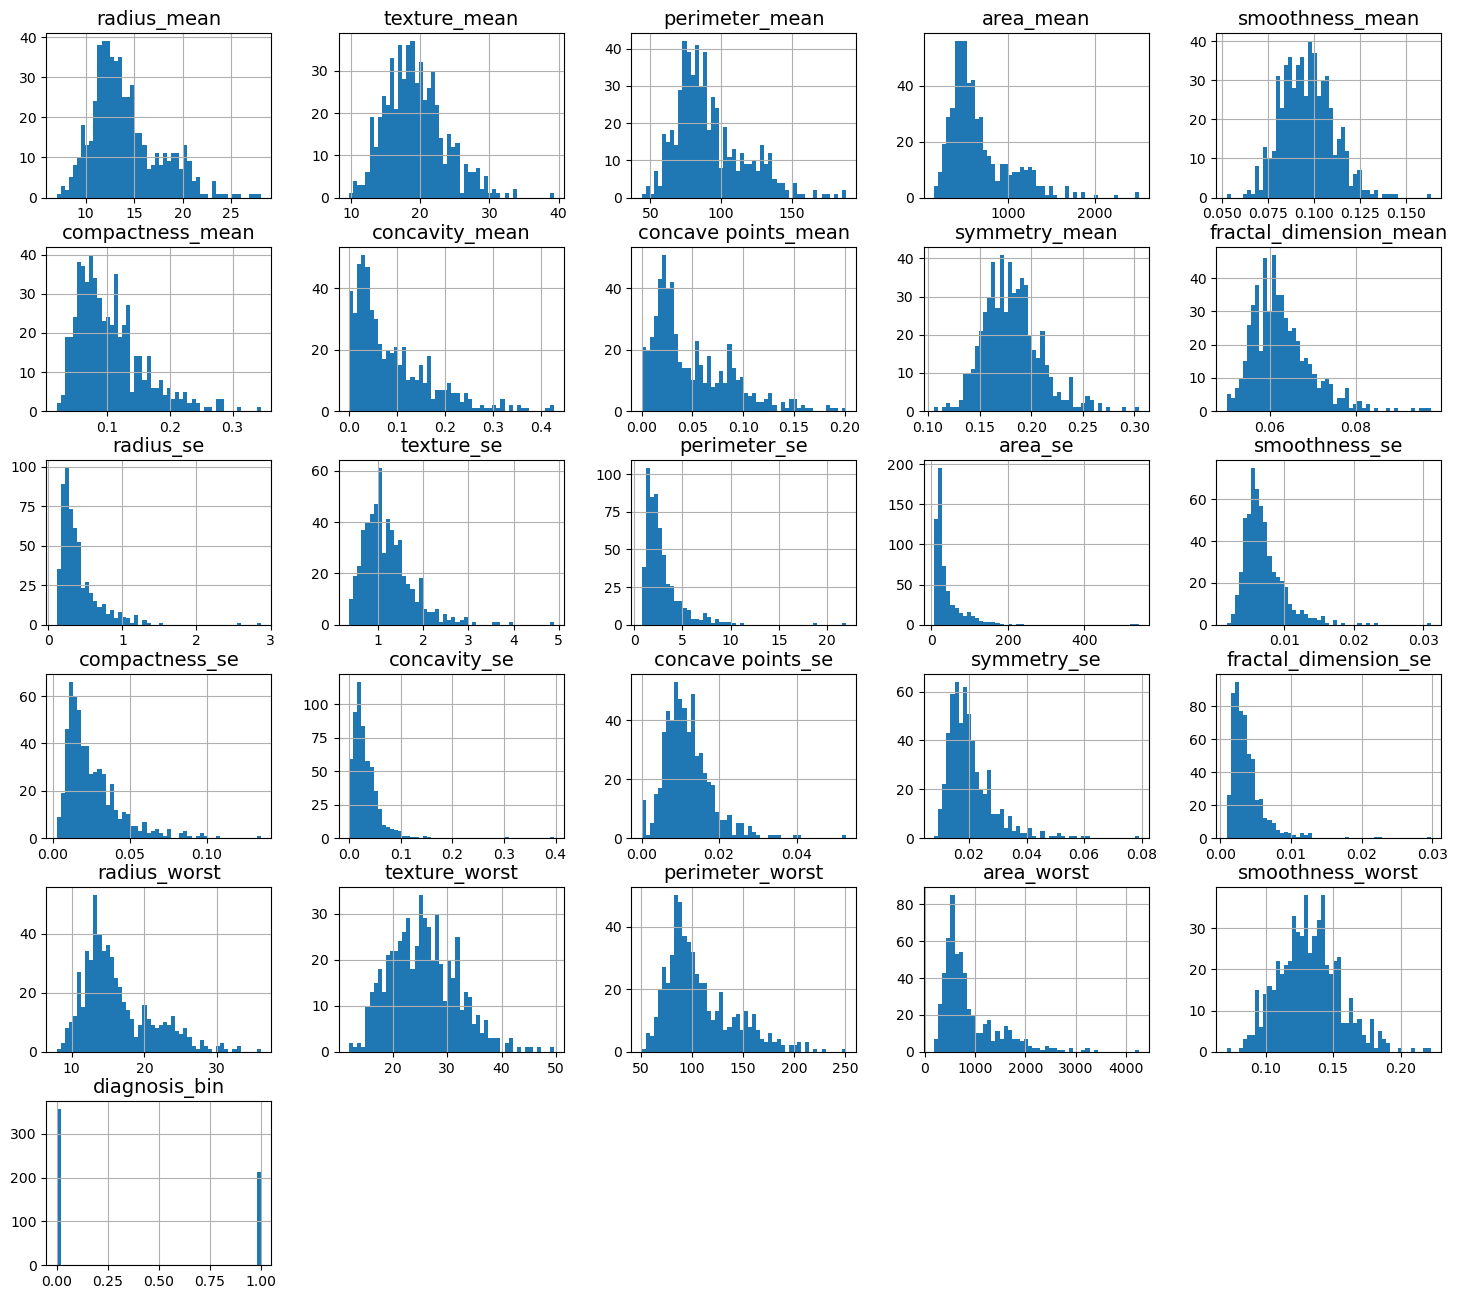

In [11]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(18, 16)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset

plt.show()

In [12]:
describe_df(df).T

DATE_TYPE MISSINGS (%) UNIQUE_VALUES CARDIN (%)
diagnosis                 object          0.0             2       0.35
radius_mean              float64          0.0           456      80.14
texture_mean             float64          0.0           479      84.18
perimeter_mean           float64          0.0           522      91.74
area_mean                float64          0.0           539      94.73
smoothness_mean          float64          0.0           474       83.3
compactness_mean         float64          0.0           537      94.38
concavity_mean           float64          0.0           537      94.38
concave points_mean      float64          0.0           542      95.25
symmetry_mean            float64          0.0           432      75.92
fractal_dimension_mean   float64          0.0           499       87.7
radius_se                float64          0.0           540       94.9
texture_se               float64          0.0           519      91.21
perimeter_se             float64          0.0           533      93.67
area_se                  float64          0.0           528      92.79
smoothness_se            float64          0.0           547      96.13
compactness_se           float64          0.0           541      95.08
concavity_se             float64          0.0           533      93.67
concave points_se        float64          0.0           507       89.1
symmetry_se              float64          0.0           498      87.52
fractal_dimension_se     float64          0.0           545      95.78
radius_worst             float64          0.0           457      80.32
texture_worst            float64          0.0           511      89.81
perimeter_worst          float64          0.0           514      90.33
area_worst               float64          0.0           544      95.61
smoothness_worst         float64          0.0           411      72.23
diagnosis_bin              int64          0.0             2       0.35

NOTA: Para más información sobre el dataset el hospital nos redirige a esta [página web](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

### Ejercicio 3: Split

Haz el split en train y test.

In [13]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)
print(len(train_set))
print(len(test_set))

455
114


### Ejercicio 4: MiniEDA (I)

Analiza la distribución frecuencial de target brevemente.

In [14]:
target.value_counts(normalize=True)

diagnosis_bin
0    0.627417
1    0.372583
Name: proportion, dtype: float64

### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, de forma que veamos las distintas distribuciones para cada clase (puedes emplear la libería gráfica que crees conveniente)

In [15]:
features_num = train_set.select_dtypes(include=('int','float')).columns.tolist()
features_num

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'diagnosis_bin']

(26, 2)


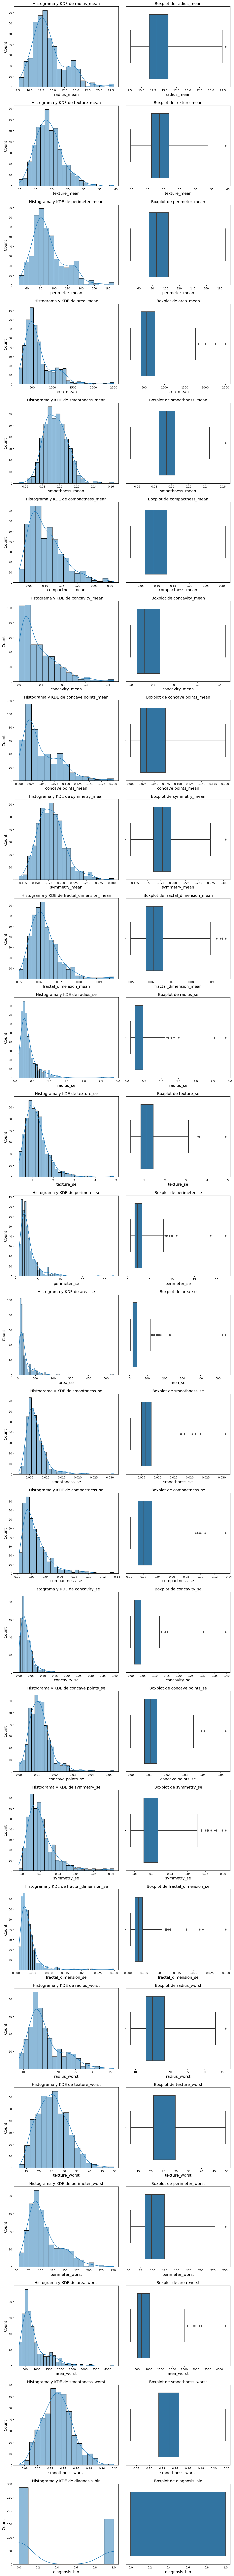

In [16]:
plot_combined_graphs(train_set,features_num,whisker_width=3)

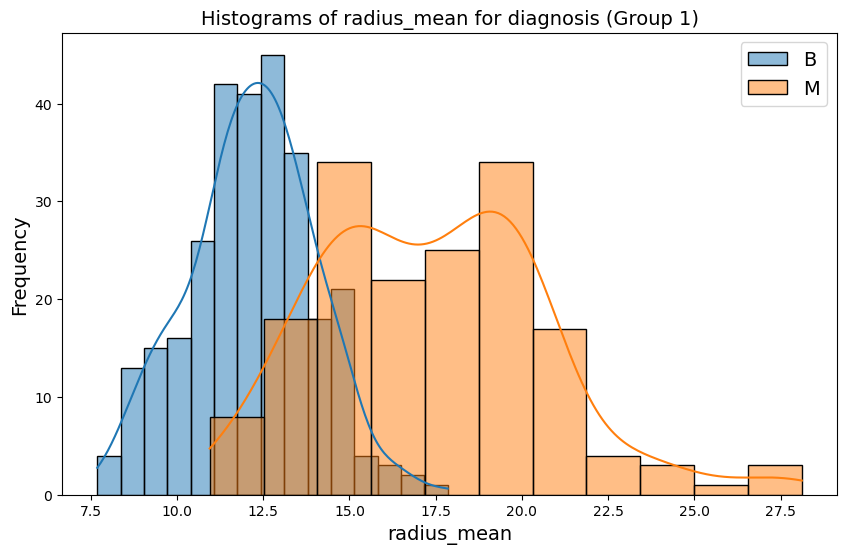

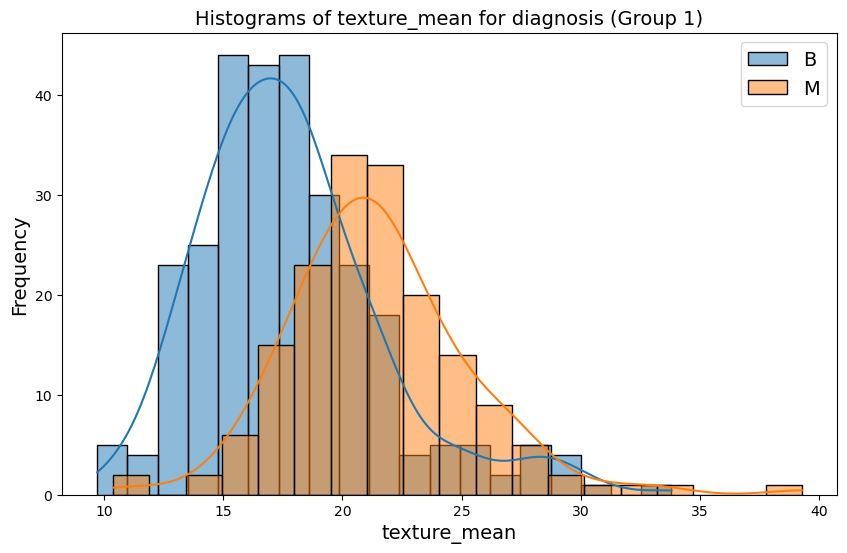

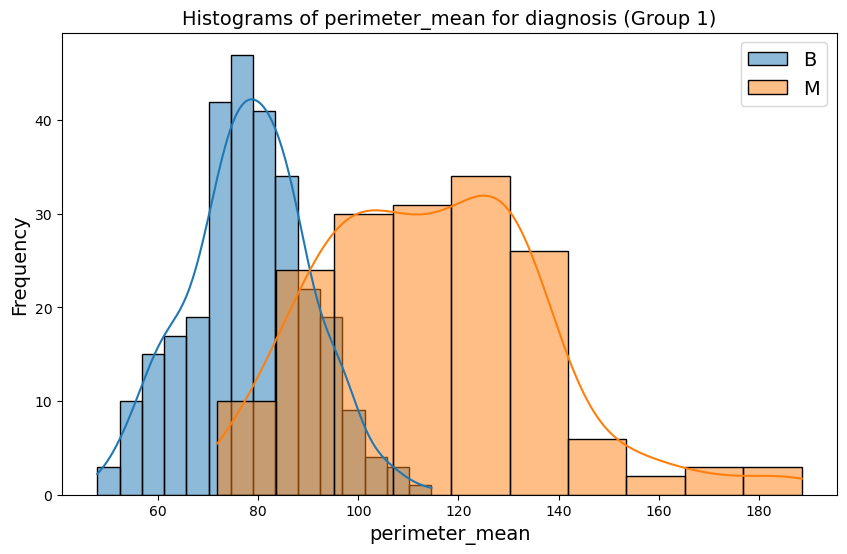

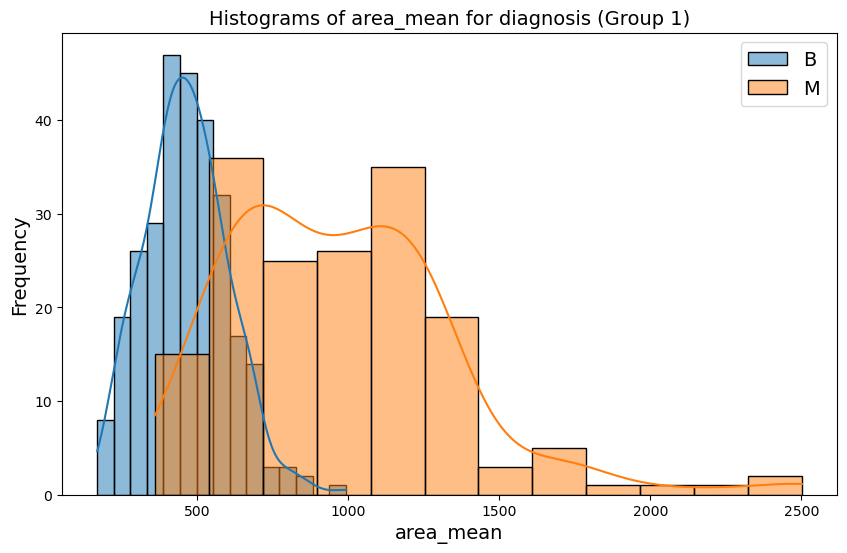

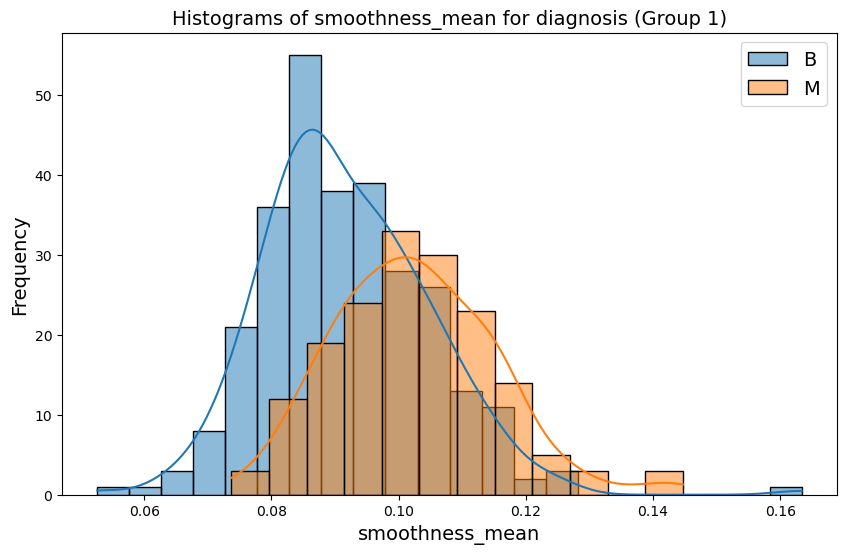

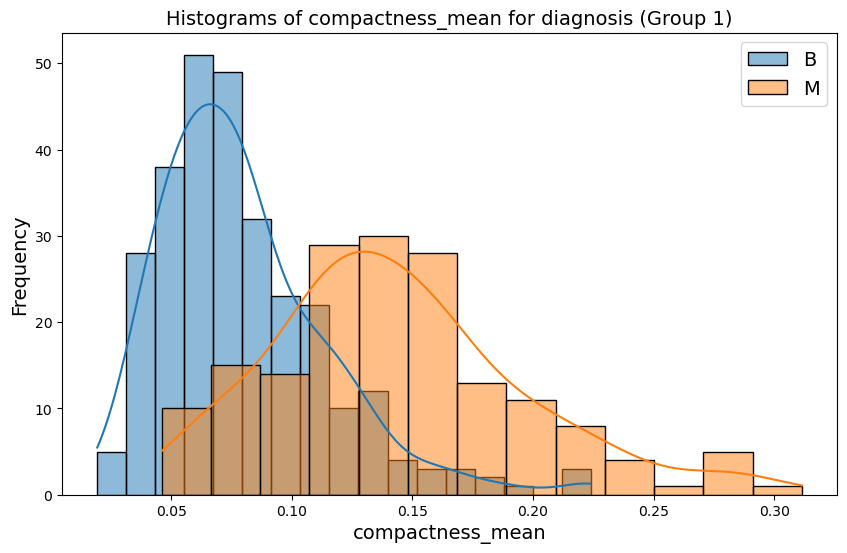

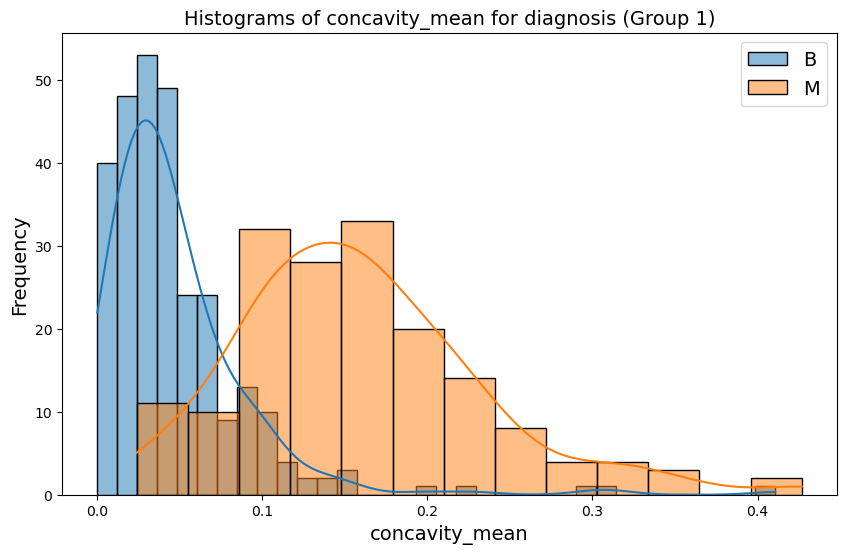

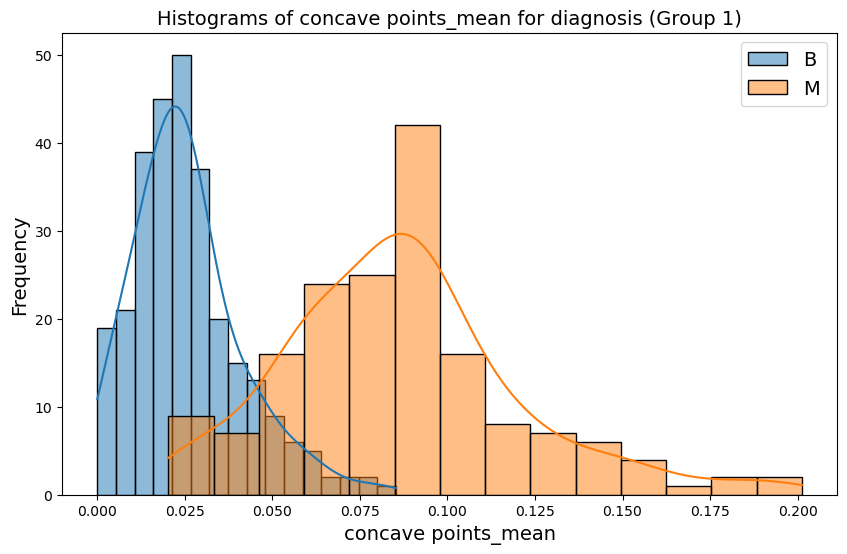

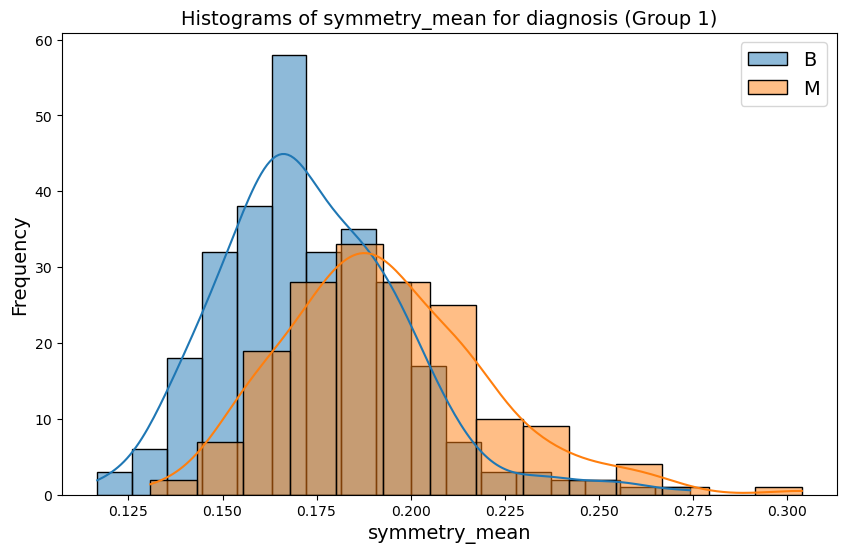

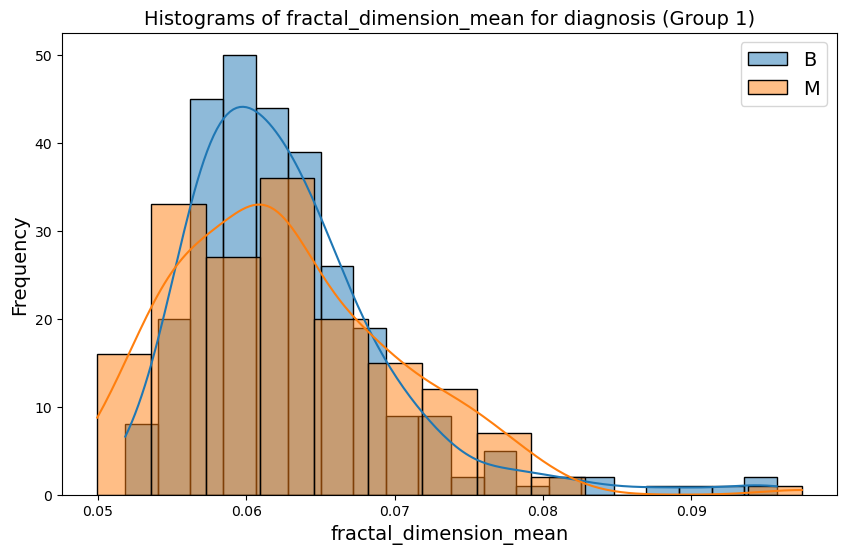

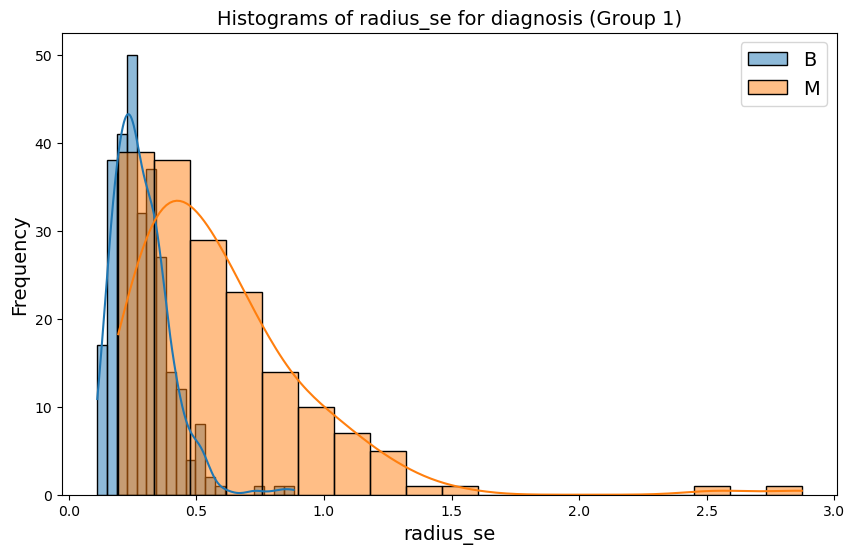

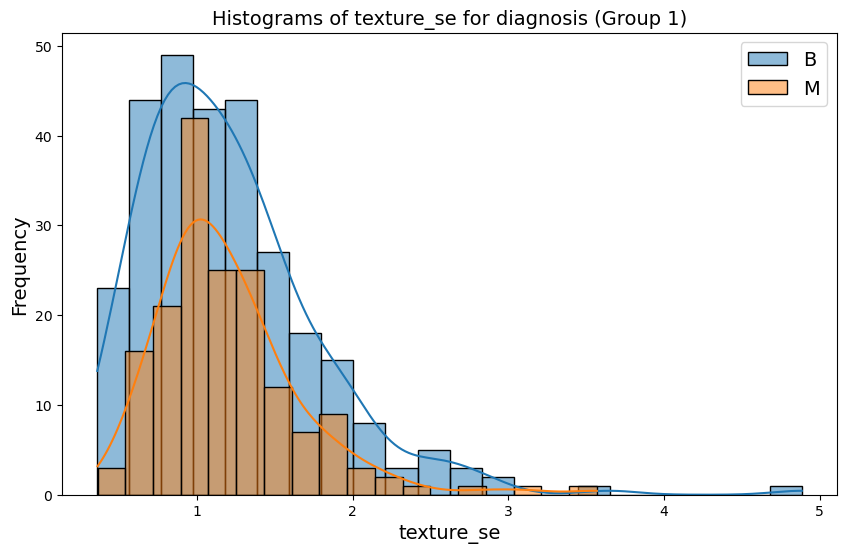

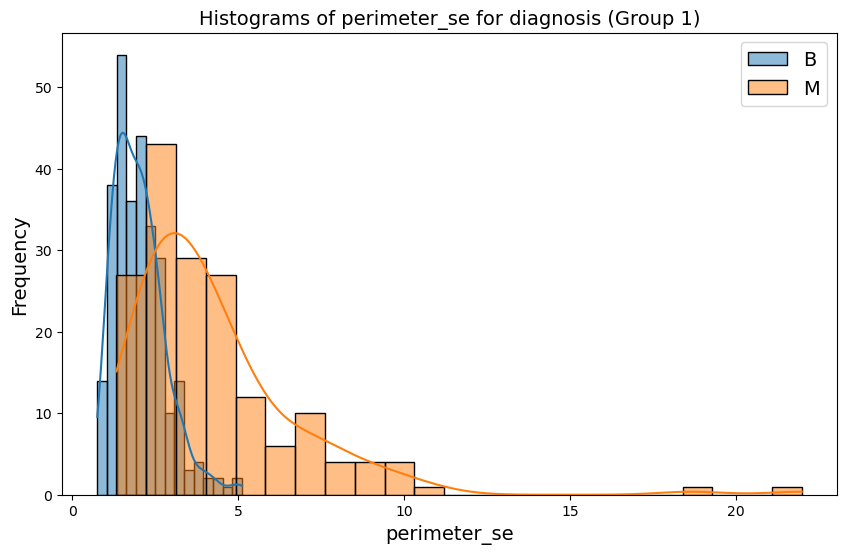

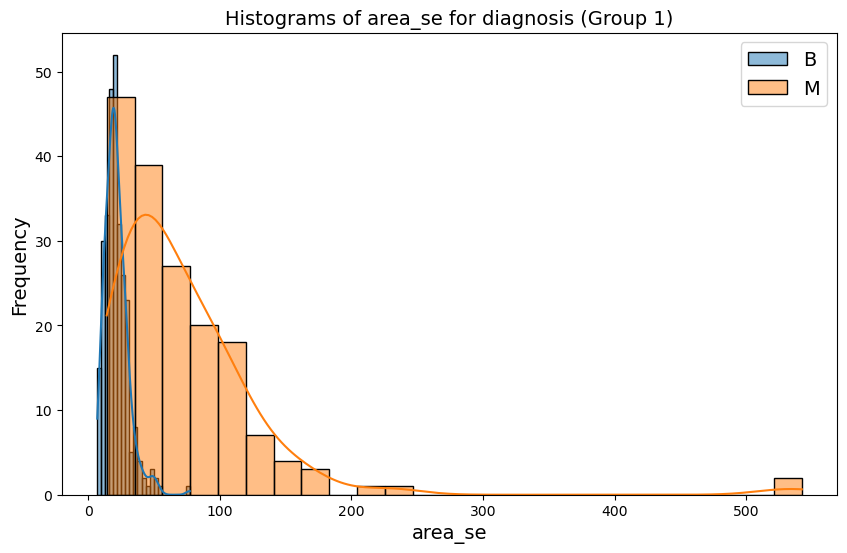

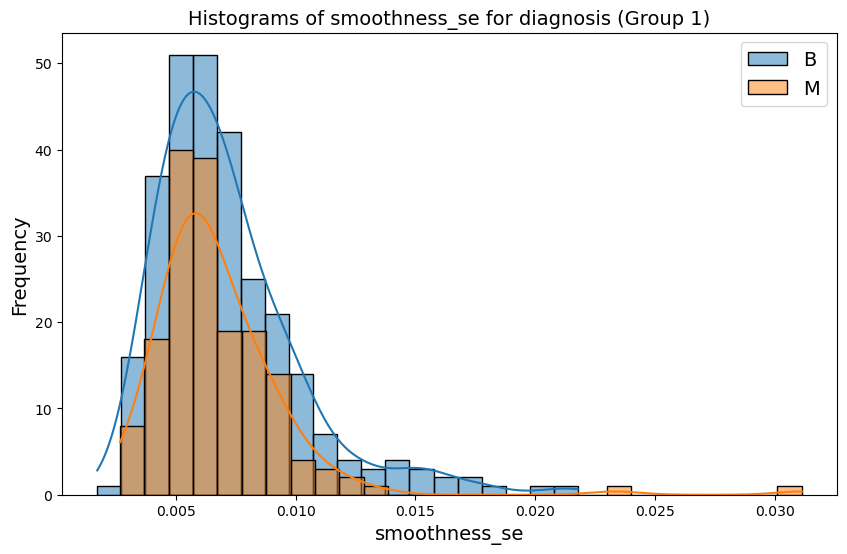

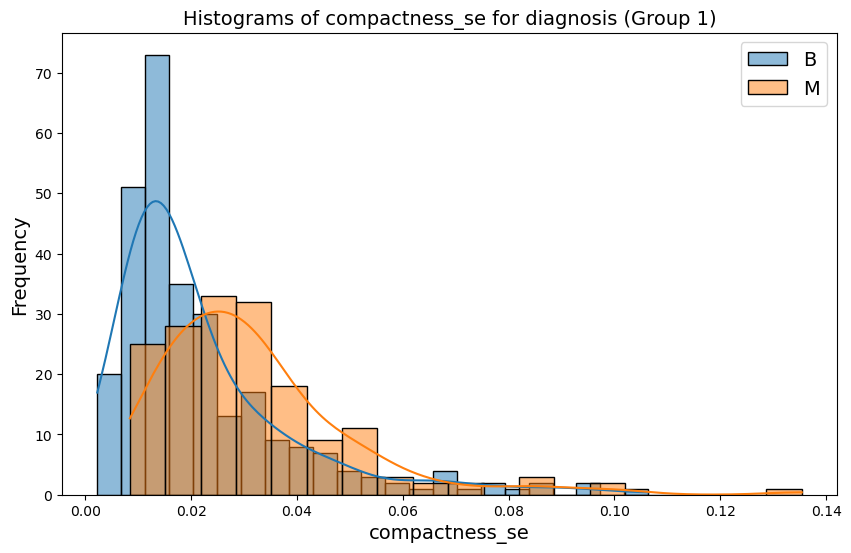

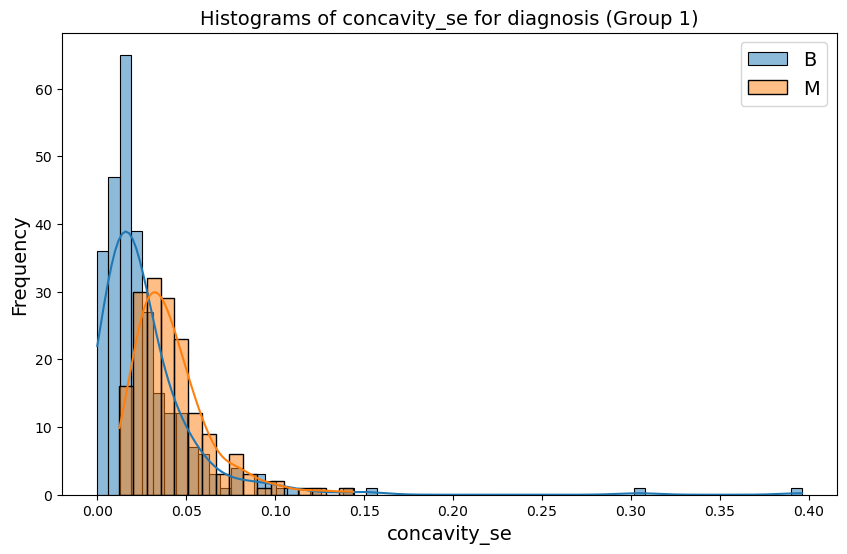

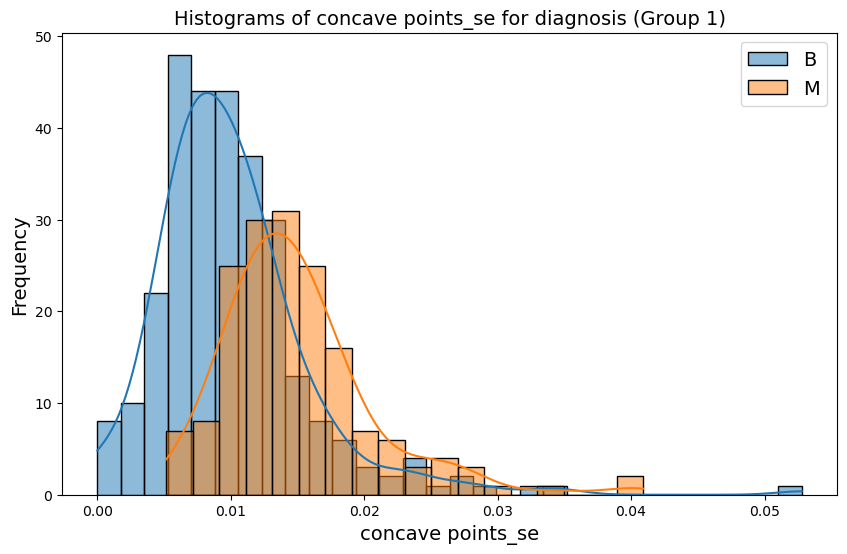

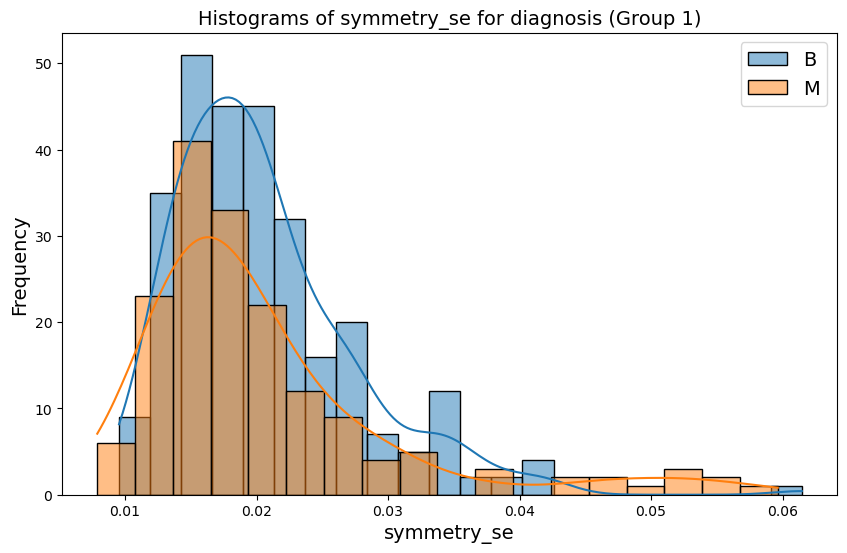

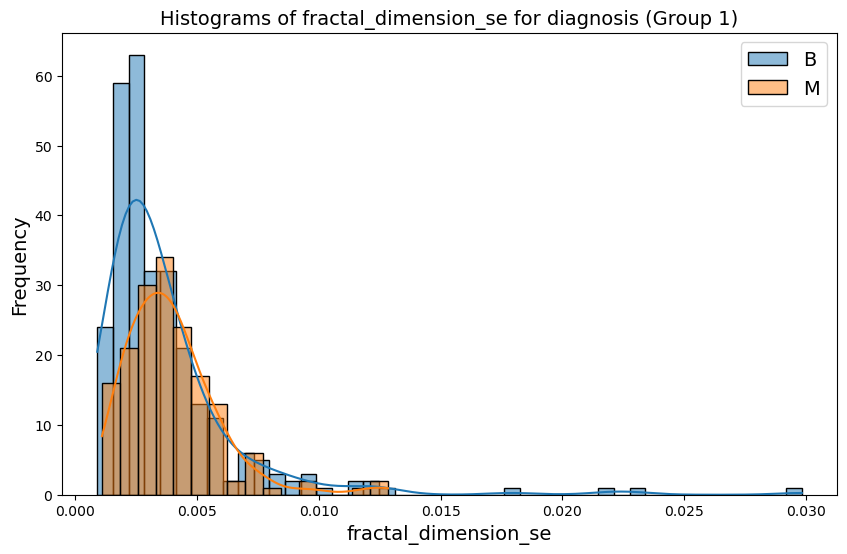

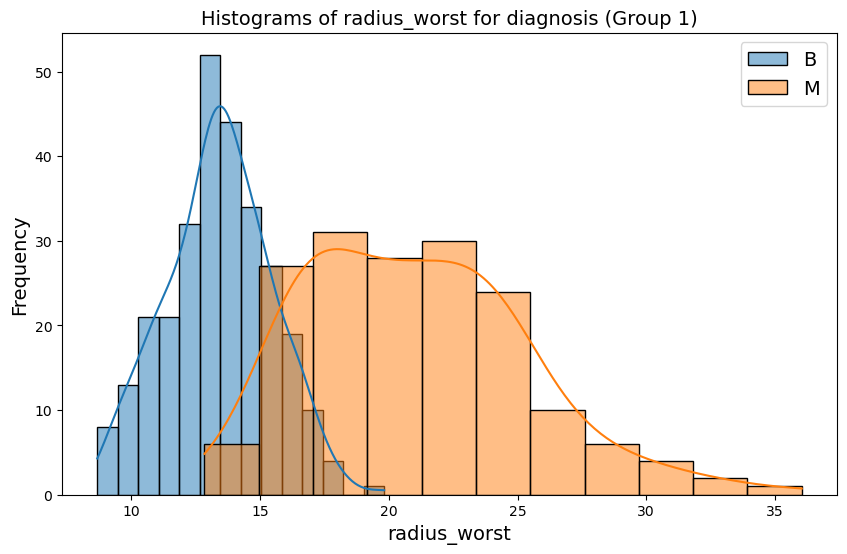

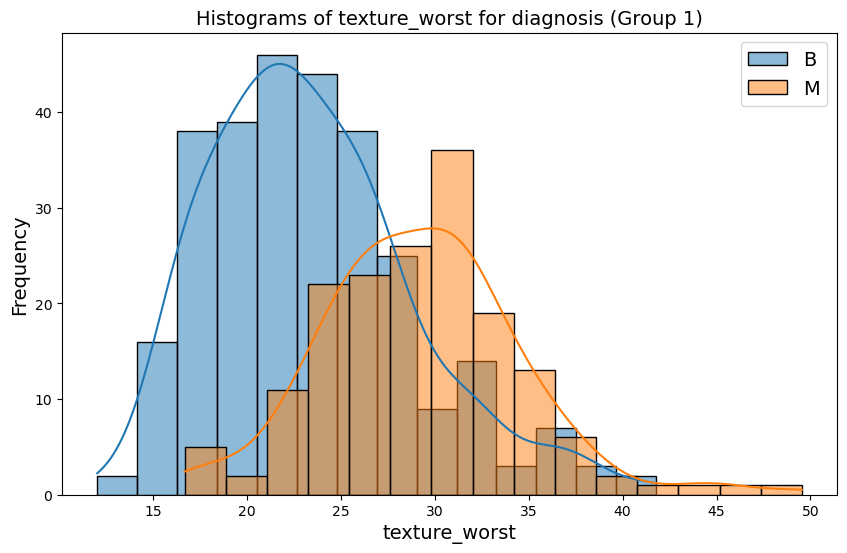

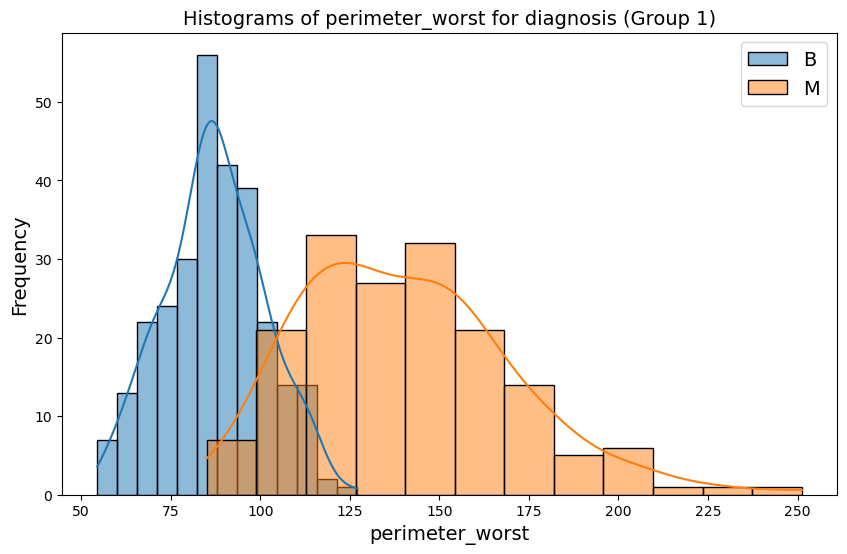

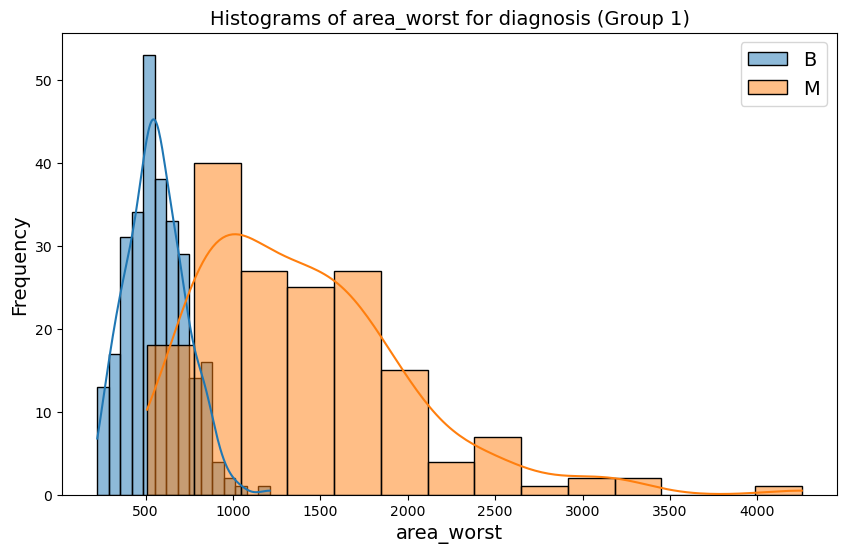

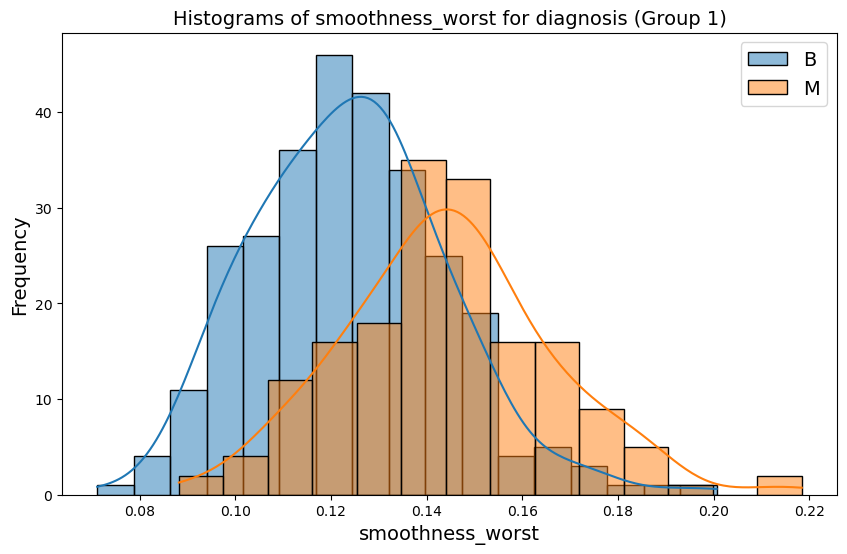

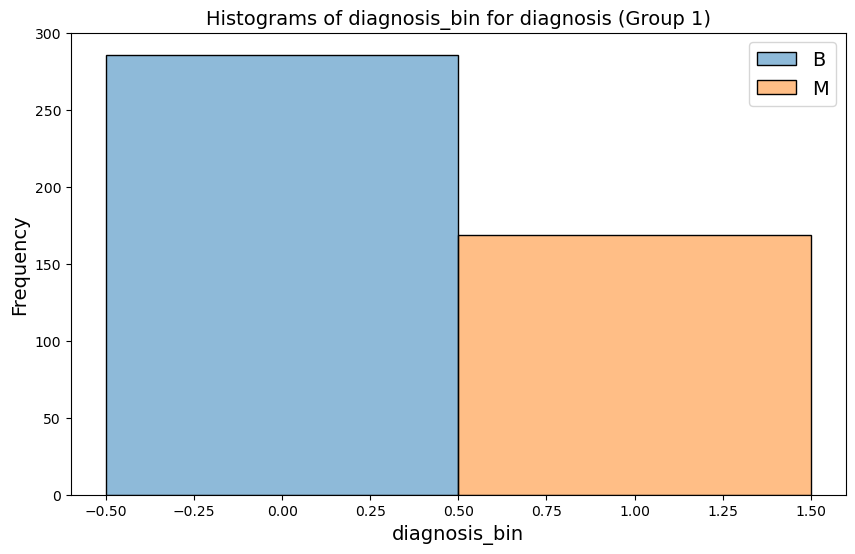

In [17]:
for col in features_num:
    plot_grouped_histograms(train_set,'diagnosis',col,2)

Por distribución con respecto a la variable target, me quedaría con todas excepto con:
'texture_se', 'smoothness_se'  puesto que prácticamente tienen la misma distribución

In [18]:
descartes_dist = ['texture_se', 'smoothness_se']

In [19]:
corr_matrix = train_set.corr(numeric_only=True)
abs(corr_matrix['diagnosis_bin'].round(2)).sort_values(ascending = False)

diagnosis_bin             1.00
concave points_mean       0.78
perimeter_worst           0.77
radius_worst              0.77
perimeter_mean            0.73
area_worst                0.72
radius_mean               0.72
area_mean                 0.70
concavity_mean            0.68
compactness_mean          0.59
radius_se                 0.54
perimeter_se              0.53
area_se                   0.52
texture_worst             0.47
smoothness_worst          0.43
texture_mean              0.42
concave points_se         0.38
smoothness_mean           0.38
symmetry_mean             0.35
compactness_se            0.25
concavity_se              0.22
smoothness_se             0.06
fractal_dimension_se      0.04
fractal_dimension_mean    0.01
symmetry_se               0.00
texture_se                0.00
Name: diagnosis_bin, dtype: float64

Por correlación no me quedo las que están por debajo de 0,22

In [20]:
descartes_corr = [corr_matrix.index[n] for n in range(len(corr_matrix)) if corr_matrix['diagnosis_bin'].iloc[n] < 0.21]
descartes_corr

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se']

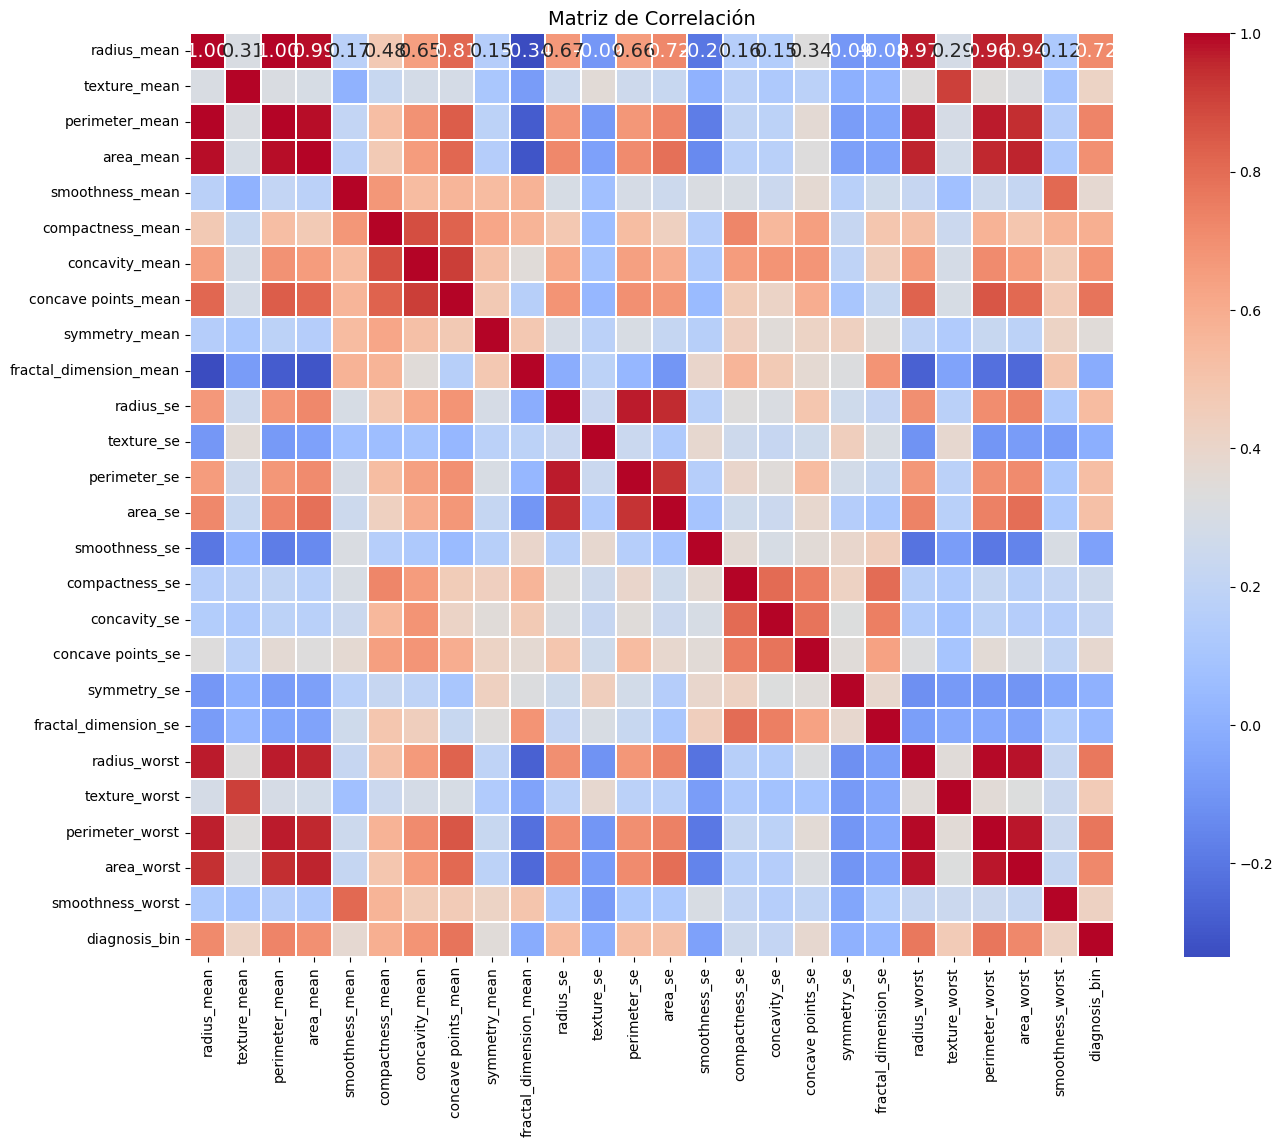

In [21]:
plt.figure(figsize=(18, 12)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
    cbar=True, square=True, linewidths=.3) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks() 
plt.yticks() 

plt.show()


In [22]:
# Calcula la matriz de correlación (incluyendo diagnosis_bin)

# Inicializar una lista para almacenar los pares de variables correlacionadas
high_corr_pairs = []

# Iterar sobre la matriz de correlación para encontrar los pares con |correlación| > 0.79
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.79:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], round(corr_matrix.iloc[i, j], 2)))

# Mostrar los pares de variables altamente correlacionadas
print("Pares de variables con correlación > 79%:")
for pair in high_corr_pairs:
    print(pair)
print('*'*25)
print()

# Seleccionar una variable de cada par según la mayor correlación con la variable objetivo 'diagnosis_bin'
selected_variables = set()

for var1, var2, corr in high_corr_pairs:
    corr_var1 = abs(corr_matrix[var1]['diagnosis_bin'])
    corr_var2 = abs(corr_matrix[var2]['diagnosis_bin'])

    if corr_var1 > corr_var2:
        selected_variables.add(var1)
    else:
        selected_variables.add(var2)

# Variables finales seleccionadas
print("Variables seleccionadas para el modelo:")
print(selected_variables)
print('*'*25)
print()

# Eliminar las variables no seleccionadas del conjunto de datos
variables_to_drop = set(corr_matrix.columns) - selected_variables - {'diagnosis_bin'}
data_reduced = corr_matrix.drop(columns=variables_to_drop)

# Verificar las nuevas columnas
print(data_reduced.head())
print('*'*25)
print(data_reduced.columns.tolist())

Pares de variables con correlación > 79%:
('perimeter_mean', 'radius_mean', 1.0)
('area_mean', 'radius_mean', 0.99)
('area_mean', 'perimeter_mean', 0.99)
('concavity_mean', 'compactness_mean', 0.88)
('concave points_mean', 'radius_mean', 0.81)
('concave points_mean', 'perimeter_mean', 0.84)
('concave points_mean', 'area_mean', 0.81)
('concave points_mean', 'compactness_mean', 0.83)
('concave points_mean', 'concavity_mean', 0.91)
('perimeter_se', 'radius_se', 0.97)
('area_se', 'radius_se', 0.95)
('area_se', 'perimeter_se', 0.94)
('concavity_se', 'compactness_se', 0.8)
('fractal_dimension_se', 'compactness_se', 0.8)
('radius_worst', 'radius_mean', 0.97)
('radius_worst', 'perimeter_mean', 0.97)
('radius_worst', 'area_mean', 0.96)
('radius_worst', 'concave points_mean', 0.83)
('texture_worst', 'texture_mean', 0.91)
('perimeter_worst', 'radius_mean', 0.96)
('perimeter_worst', 'perimeter_mean', 0.97)
('perimeter_worst', 'area_mean', 0.96)
('perimeter_worst', 'concave points_mean', 0.86)
('pe

In [23]:
selected_variables

{'area_worst',
 'compactness_se',
 'concave points_mean',
 'concavity_mean',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

Supongo que habría que preguntar a un experto si se pueden quitar o no estas variable que correlacionan tan alto entre sí.  
Si hubiera tiempo, sería bueno hacer el modelo dejando las mínimas posibles y sin quitarlas.

### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en función de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En función de la lista anterior, ¿tienes que tratar las variables, por qué?

In [24]:
features_eda = data_reduced.columns.tolist()
features_eda

['radius_mean',
 'perimeter_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'compactness_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'diagnosis_bin']

Lista de modelos:
- Regresión logística
- Árbol de decisión
- Random Forest
- Gradient Boosting

(13, 2)


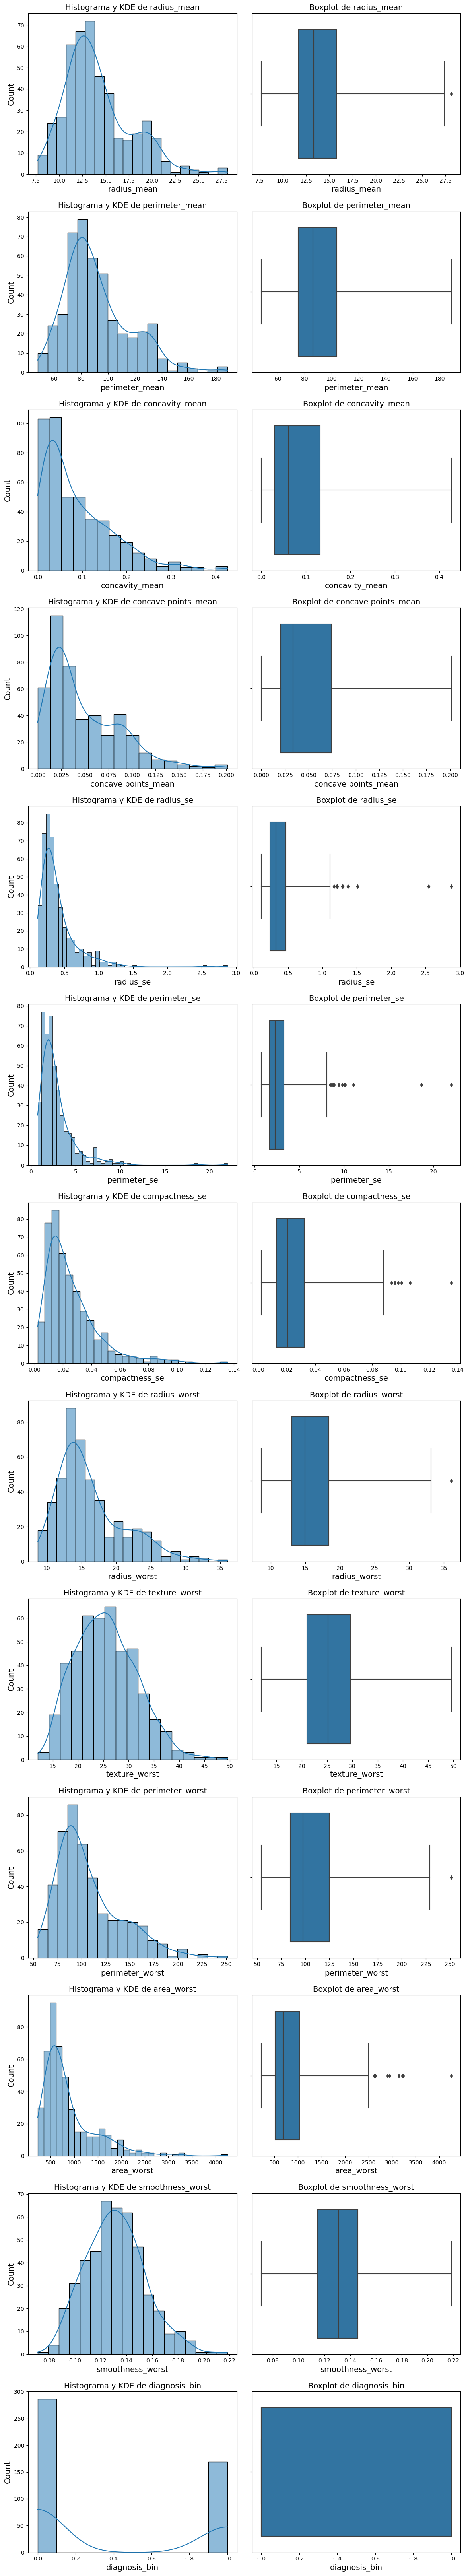

In [25]:
plot_combined_graphs(train_set,features_eda,whisker_width=3)

In [26]:
train_set_copy = train_set.copy()
train_set = train_set[features_eda]
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 68 to 102
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          455 non-null    float64
 1   perimeter_mean       455 non-null    float64
 2   concavity_mean       455 non-null    float64
 3   concave points_mean  455 non-null    float64
 4   radius_se            455 non-null    float64
 5   perimeter_se         455 non-null    float64
 6   compactness_se       455 non-null    float64
 7   radius_worst         455 non-null    float64
 8   texture_worst        455 non-null    float64
 9   perimeter_worst      455 non-null    float64
 10  area_worst           455 non-null    float64
 11  smoothness_worst     455 non-null    float64
 12  diagnosis_bin        455 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 49.8 KB


In [27]:
test_set_copy = test_set.copy()
test_set = test_set[features_eda]
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 204 to 265
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          114 non-null    float64
 1   perimeter_mean       114 non-null    float64
 2   concavity_mean       114 non-null    float64
 3   concave points_mean  114 non-null    float64
 4   radius_se            114 non-null    float64
 5   perimeter_se         114 non-null    float64
 6   compactness_se       114 non-null    float64
 7   radius_worst         114 non-null    float64
 8   texture_worst        114 non-null    float64
 9   perimeter_worst      114 non-null    float64
 10  area_worst           114 non-null    float64
 11  smoothness_worst     114 non-null    float64
 12  diagnosis_bin        114 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 12.5 KB


### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features estén escalados para que el algoritmo no se decante (érroneamente) por alguna feature sólo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

In [28]:
# Features para hacer la transformación logarítmica
features_eda_log =['concave points_mean','radius_se','perimeter_se','compactness_se','area_worst']

# Features para hacer la standarización directamente
features_scaler = set(features_eda) - set(features_eda_log) 
features_scaler = list(features_scaler)
features_scaler.remove('diagnosis_bin')
features_scaler


['concavity_mean',
 'smoothness_worst',
 'texture_worst',
 'perimeter_worst',
 'radius_mean',
 'perimeter_mean',
 'radius_worst']

In [29]:
# Lo hago todo a la vez para el train y test, aunque habría que hacerlo por separado
scaler = StandardScaler()

for col in features_eda_log:
    # Transformación logarítmica
    train_set[f"log_{col}"] = train_set[col].apply(lambda x: np.log(x + 0.00001))
    test_set[f"log_{col}"] = test_set[col].apply(lambda x: np.log(x + 0.00001))
    
    # Escalo los datos
    train_set[f"log_{col}"] = scaler.fit_transform(train_set[[f"log_{col}"]])
    test_set[f"log_{col}"] = scaler.transform(test_set[[f"log_{col}"]]) 
    
for col in features_scaler:
    train_set[col] = scaler.fit_transform(train_set[[col]])
    test_set[col] = scaler.transform(test_set[[col]])     

In [30]:
train_set.describe()

radius_mean  perimeter_mean  concavity_mean  concave points_mean  \
count  4.550000e+02    4.550000e+02    4.550000e+02           455.000000   
mean  -3.162306e-16   -1.132183e-16   -5.953723e-17             0.048280   
std    1.001101e+00    1.001101e+00    1.001101e+00             0.038060   
min   -1.819583e+00   -1.809497e+00   -1.119899e+00             0.000000   
25%   -6.830930e-01   -6.907613e-01   -7.505387e-01             0.020340   
50%   -2.314983e-01   -2.429378e-01   -3.446456e-01             0.033410   
75%    4.593426e-01    4.884799e-01    5.473870e-01             0.073895   
max    3.961679e+00    3.976811e+00    4.256736e+00             0.201200   

        radius_se  perimeter_se  compactness_se  radius_worst  texture_worst  \
count  455.000000    455.000000      455.000000  4.550000e+02   4.550000e+02   
mean     0.402016      2.858253        0.025635 -7.027346e-17  -6.754060e-16   
std      0.283161      2.071209        0.018607  1.001101e+00   1.001101e+00   
min      0.111500      0.757000        0.002252 -1.572438e+00  -2.230887e+00   
25%      0.234800      1.653000        0.012730 -6.616975e-01  -7.412292e-01   
50%      0.323700      2.287000        0.020420 -2.632354e-01  -5.210786e-02   
75%      0.467750      3.270500        0.032295  4.525400e-01   6.857059e-01   
max      2.873000     21.980000        0.135400  4.120889e+00   3.962127e+00   

       perimeter_worst   area_worst  smoothness_worst  diagnosis_bin  \
count     4.550000e+02   455.000000      4.550000e+02     455.000000   
mean     -2.928061e-17   876.987033     -1.561632e-17       0.371429   
std       1.001101e+00   567.672841      1.001101e+00       0.483719   
min      -1.578174e+00   223.600000     -2.617938e+00       0.000000   
25%      -6.853483e-01   516.450000     -7.430298e-01       0.000000   
50%      -2.829543e-01   686.600000     -2.741590e-02       0.000000   
75%       5.263332e-01  1031.500000      6.296478e-01       1.000000   
max       4.322305e+00  4254.000000      3.767506e+00       1.000000   

       log_concave points_mean  log_radius_se  log_perimeter_se  \
count             4.550000e+02   4.550000e+02      4.550000e+02   
mean             -2.030122e-16  -2.928061e-16      2.762137e-16   
std               1.001101e+00   1.001101e+00      1.001101e+00   
min              -5.852023e+00  -2.076856e+00     -2.170685e+00   
25%              -3.032305e-01  -6.953543e-01     -7.153510e-01   
50%               5.808814e-02  -9.969856e-02     -1.103694e-01   
75%               6.361255e-01   5.832165e-01      5.562010e-01   
max               1.365628e+00   3.950717e+00      4.106493e+00   

       log_compactness_se  log_area_worst  
count        4.550000e+02    4.550000e+02  
mean        -2.264367e-16    8.315692e-16  
std          1.001101e+00    1.001101e+00  
min         -3.320464e+00   -2.177666e+00  
25%         -7.209302e-01   -6.619928e-01  
50%         -1.068374e-02   -1.463876e-01  
75%          6.784259e-01    5.905502e-01  
max          2.833702e+00    3.155864e+00

In [31]:
train_set.columns

Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'compactness_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'diagnosis_bin', 'log_concave points_mean',
       'log_radius_se', 'log_perimeter_se', 'log_compactness_se',
       'log_area_worst'],
      dtype='object')

### Ejercicio 8: Creación de los dataset de train y test

Crea las parejas X,y de train y test.

In [33]:
columnas_eliminar= ['concave points_mean', 'radius_se', 'perimeter_se', 'compactness_se','area_worst','diagnosis_bin']

X_train = train_set.drop(columns=columnas_eliminar)
y_train = train_set['diagnosis_bin'] 
X_test = test_set.drop(columns=columnas_eliminar)
y_test = test_set['diagnosis_bin']

### Ejercicio 9: Instanciación de modelos

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ningún hiperparámetro salvo en los basados en árboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. Si quieres emplear la regresión logística es posible que tengas que utilizar un valor de max_iter para que el algoritmo converja.

- Regresión logística
- Árbol de decisión
- Random Forest
- Gradient Boosting

In [40]:
reg_log = LogisticRegression(max_iter=10000, random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=42)
rf = RandomForestClassifier(max_depth=4,random_state=42)
gb = GradientBoostingClassifier(max_depth=4,random_state=42)

### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validación cruzada). Utiliza k = 5, y un scoring acorde a la métrica escogida en el ejercicio 1. Si no tienes clara la métrica entonces emplea el recall_medio y usa scoring = "balanced acuracy". Escoge el modelo ganador.

In [41]:
model_names = ['LogisticRegression', 'DecisionTree','RandomForest','GrandientBoost']
model_set = [reg_log, tree, rf, gb]

# Crear un diccionario para almacenar las métricas de validación cruzada
metricas_cv = {}

# Lista para almacenar los valores 
valores = []

# Realizar validación cruzada para cada modelo
for nombre, modelo in zip(model_names, model_set):
    # Calcular las métricas de validación cruzada 
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring= 'precision')
        
    # Almacenar el resultado
    metricas_cv[nombre] = scores
    valores.append(np.mean(scores))

# Encontrar el modelo con la mayor métrica
ganador = list(metricas_cv.keys())[np.argmax(valores)]

# Imprimir los resultados
print("Resultados de la validación cruzada:")
for nombre, scores in metricas_cv.items():
    print(f"{nombre}: precision = {np.mean(scores):.3f}")
print('*'*25)
print(f"\nEl ganador es: {ganador}")


Resultados de la validación cruzada:
LogisticRegression: precision = 0.976
DecisionTree: precision = 0.928
RandomForest: precision = 0.934
GrandientBoost: precision = 0.946
*************************

El ganador es: LogisticRegression


### Ejercicio 11: Ajuste de hiperparámetros

Escoge un grid para ajustar los hiperparámetros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su método fit) para encontrar la mejor combinaciónde hiperparámetros empleando la métrica que decidimos en el ejercio 1. Si no lo tienes claro emplea "balance accuracy". Por otro lado, incluye en el grid, el hiperparámetro que permita que el modelo "compense" el desbalanceo del dataset de entrada, aunque este no lo tenga.

In [48]:
params_grid = {
    'penalty':['l1','l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight':['balanced']
}

reg_log_grid = GridSearchCV(
    estimator=reg_log,
    param_grid=params_grid,
    cv=5,
    scoring='precision'
)

reg_log_grid.fit(X_train,y_train)
y_predict_reg_log_grid = reg_log_grid.predict(X_train)
print(classification_report(y_train,y_predict_reg_log_grid))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       286
           1       0.96      0.96      0.96       169

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



### Ejercicio 12: Evaluación del modelo

Evalúa el modelo contra el dataset de test. Muestra el informe de clasificación y haz una valoración de si el hospital aceptaría el modelo o no.

In [49]:
y_predict_reg_log_grid = reg_log_grid.predict(X_test)
print(classification_report(y_test,y_predict_reg_log_grid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Ejercicio 13: Análisis de errores

Muestra la matriz de confusión con los porcentajes de precisión (emplea ConfusionMatrixDisplay.from_predictions con el argumento normalize con el valor adecuado). Haz un pequeño análisis.

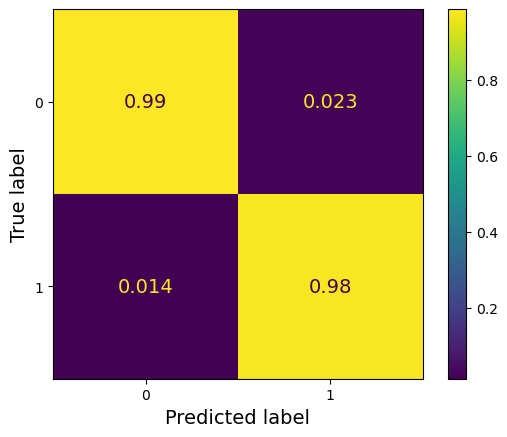

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_predict_reg_log_grid,normalize='pred')

### EXTRA: 

Busca en Internet o pregúntale a tu AI preferida, cómo se graba un modelo en disco y gúardalo en "./models/cancer_pred" con la extesión apropiada.

In [53]:
from joblib import dump

# Supongamos que tienes un modelo llamado reg_log entrenado y deseas guardarlo en disco
# Aquí reg_log sería tu modelo de regresión logística ya ajustado

# Ruta donde guardar el modelo y nombre del archivo
file_path = "./models/cancer_pred.joblib"

# Guardar el modelo en disco
dump(reg_log_grid, file_path)

['./models/cancer_pred.joblib']